In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
df.drop("customerID",axis=1,inplace=True)

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
df.replace("No phone service","No",inplace=True)

In [8]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
df.replace("No internet service","No",inplace=True)

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
df.replace({"Male":0,"Female":1},inplace=True)

C:\Users\praty\AppData\Local\Temp\ipykernel_14368\3526704881.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Male":0,"Female":1},inplace=True)


In [12]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,1,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df=pd.get_dummies(columns=["InternetService","Contract","PaymentMethod"],data=df)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,Yes,No,1,No,No,No,Yes,No,...,True,False,False,True,False,False,False,False,True,False
1,0,0,No,No,34,Yes,No,Yes,No,Yes,...,True,False,False,False,True,False,False,False,False,True
2,0,0,No,No,2,Yes,No,Yes,Yes,No,...,True,False,False,True,False,False,False,False,False,True
3,0,0,No,No,45,No,No,Yes,No,Yes,...,True,False,False,False,True,False,True,False,False,False
4,1,0,No,No,2,Yes,No,No,No,No,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,Yes,Yes,11,No,No,Yes,No,No,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,Yes,No,4,Yes,Yes,No,No,No,...,False,True,False,True,False,False,False,False,False,True


In [16]:
df.replace({True:1,False:0},inplace=True)

C:\Users\praty\AppData\Local\Temp\ipykernel_14368\2938164920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace=True)


In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,Yes,No,1,No,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,0,0,No,No,34,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,0,0,No,No,2,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,0,0,No,No,45,No,No,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,1,0,No,No,2,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,Yes,Yes,11,No,No,Yes,No,No,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,Yes,No,4,Yes,Yes,No,No,No,...,0,1,0,1,0,0,0,0,0,1


In [18]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [19]:
df.replace({"Yes":1,"No":0},inplace=True)

C:\Users\praty\AppData\Local\Temp\ipykernel_14368\981542203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes":1,"No":0},inplace=True)


In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


<Axes: xlabel='Churn'>

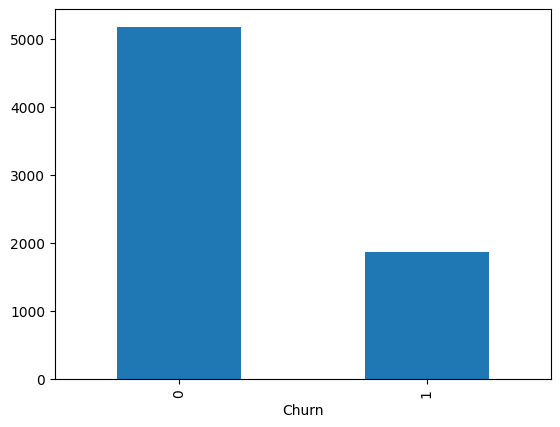

In [21]:
df.groupby("Churn")["Churn"].count().plot(kind="bar")

In [22]:
df0=df[df["Churn"]==0]
df1=df[df["Churn"]==1]

In [23]:
df0_s1=df0.sample(len(df1))

In [24]:
df0_s1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1723,1,0,1,1,6,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6624,0,0,1,1,64,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
6815,0,0,1,1,72,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
5325,0,0,1,1,5,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6555,0,0,0,0,18,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0,0,1,1,10,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4852,0,1,0,0,69,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1052,1,0,0,0,40,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4952,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
df_final_1=pd.concat([df0_s1,df1],axis=0)

In [26]:
df_final_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1723,1,0,1,1,6,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6624,0,0,1,1,64,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
6815,0,0,1,1,72,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
5325,0,0,1,1,5,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6555,0,0,0,0,18,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,67,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_final_1.Churn.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [29]:
y=df_final_1["Churn"]
x=df_final_1.drop("Churn",axis=1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [31]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

c:\Users\praty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [33]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4970 - loss: 10.0166
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.5046 - loss: 0.6932
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5012 - loss: 0.6933
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.4911 - loss: 0.6933
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.4700 - loss: 0.6939
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.4931 - loss: 0.6933
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5115 - loss: 0.6933
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.4724 - loss: 0.6933
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.5191 - loss: 0.6931
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.4851 - loss: 0.6936


In [34]:
df0_over_sample=df0.sample(5163)

In [35]:
df0_over_sample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4661,1,0,1,1,70,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1488,0,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4416,1,0,1,0,17,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1072,0,0,0,0,22,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2449,0,0,1,1,11,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,1,0,1,1,70,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
3852,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4204,0,1,0,0,5,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4892,0,1,0,0,20,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
over_sampled_df=pd.concat([df0_over_sample,df1],axis=0)

In [37]:
over_sampled_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4661,1,0,1,1,70,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1488,0,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4416,1,0,1,0,17,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1072,0,0,0,0,22,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2449,0,0,1,1,11,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,67,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [38]:
over_sampled_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
y=over_sampled_df["Churn"]

In [40]:
x=over_sampled_df.drop("Churn",axis=1)

In [41]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4661,1,0,1,1,70,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1488,0,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4416,1,0,1,0,17,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1072,0,0,0,0,22,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2449,0,0,1,1,11,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,67,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1252,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1905,1,0,0,0,41,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3243,1,0,0,0,19,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5310,0,0,1,0,43,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
3605,0,0,0,0,34,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,1,0,0,0,59,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
2210,1,0,0,0,69,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4204,0,1,0,0,5,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1282,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [44]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7263 - loss: 0.6348
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.7407 - loss: 0.5733
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.7287 - loss: 0.5849
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7341 - loss: 0.5803
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7295 - loss: 0.5850
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7277 - loss: 0.5861
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7286 - loss: 0.5853
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.7460 - loss: 0.5679
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7379 - loss: 0.5770
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7278 - loss: 0.5858


In [45]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.7362 - loss: 0.5772


[0.5664034485816956, 0.746268630027771]

In [46]:
# SMOTE method

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smote=SMOTE(sampling_strategy="minority")

In [54]:
x_sm,y_sm=smote.fit_resample(X=x,y=y)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1935,1,0,0,0,51,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
640,0,0,1,1,68,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3125,0,0,0,0,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1004,0,0,0,0,21,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6026,1,0,0,0,13,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,67,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
